# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For saving models
import pickle

### Load dataset

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Gather basic information about the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Cleaning Data

### Rename columns

In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [8]:
df0.duplicated().sum()

3008

3,008 rows contain duplicates. That is more than 20% of the data.

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The above output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

These are the duplicated entries which we found in the data. Considering the number of fields and some are even subjective to personal beliefs, It is quite unlikely that these many entires are same by chance. Most likely some employees made double entries. So drop the duplicates.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

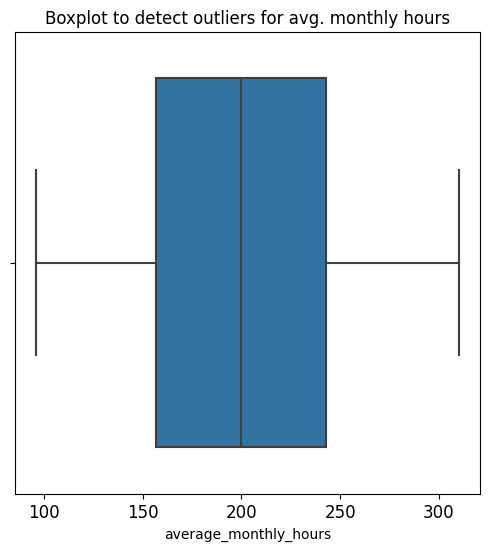

In [11]:
# Create a boxplot to visualize distribution of `aveerage monthly hours` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for avg. monthly hours', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['average_monthly_hours'])
plt.show()

The boxplot above shows that there are no outliers in the `average_monthly_hours` variable. 

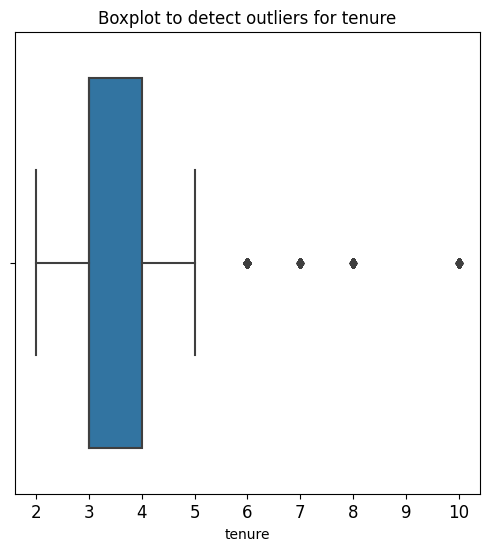

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

There are outliers present in case of variable 'tenure'

In [13]:
# Mark the outliers in case during model building we would like to remove those.

p25 = df1['tenure'].quantile(0.25)
p75 = df1['tenure'].quantile(0.75)

iqr = p75 - p25

upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Number of rows in the data containing outliers in `tenure`: 824


In [14]:
# Numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Percentwise
print(df1['left'].value_counts()/df1.shape[0])

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Create a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

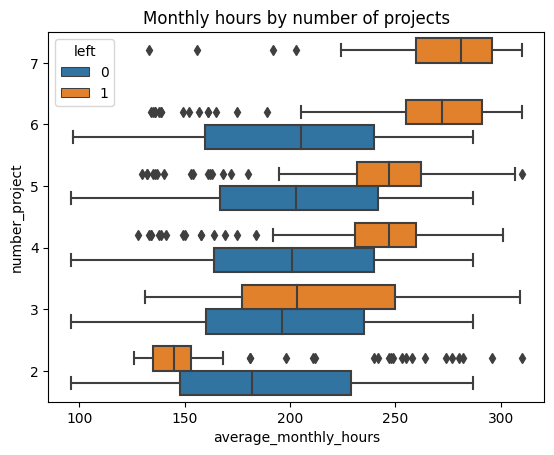

In [15]:
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h")
ax = plt.gca()
ax.invert_yaxis()
plt.title('Monthly hours by number of projects')

plt.show()

#### Inferences

1. There is no blue bar on the project 7. So people who worked on 7 projects all left the company.
2. There is a trend which we can see that more number of projects so more average working hours which is kind of obvious
3. We can see that the people who left the company either worked more than the rest of the employees of similar number of projects or less. The people who worked less might be fired from the company as they might be not performing that well or might not be interested in what they were doing. The people who worked more are natural to be pissed off and quit.

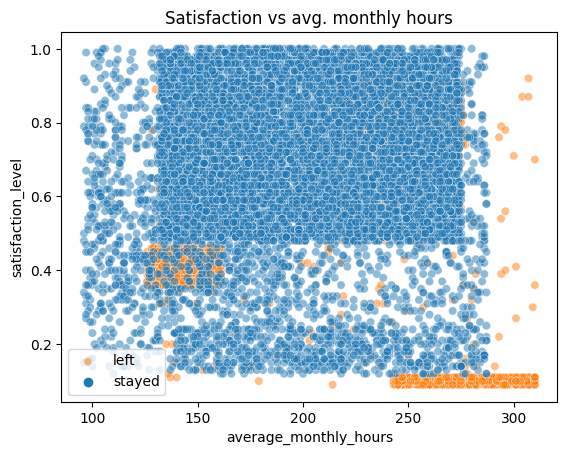

In [16]:
#Compare employees who left vs stayed by creating scatterplot of `average_monthly_hours` versus `satisfaction_level`
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.legend(labels=['left', 'stayed'])
plt.title('Satisfaction vs avg. monthly hours');

We can see that there is dense yellow region on bottom left of the plot. Those employees worked for more than 250 hrs/month and had satisfaction level ranging from 0.1 to 0. There is also a chunk of users around 150 hr mark with satisfaction level around 0.4 who left. 

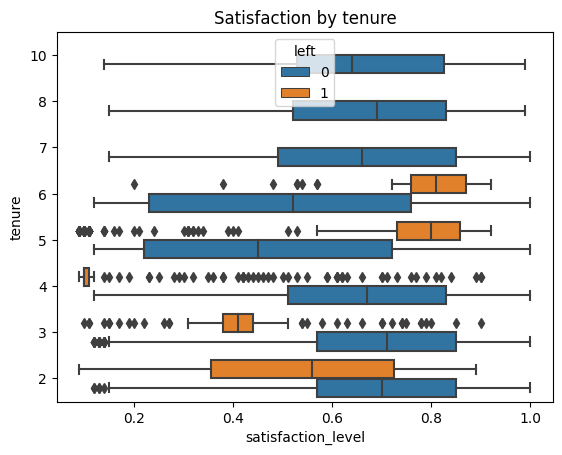

In [17]:
#Compare employees who left vs stayed by creating boxplot of `tenure` versus `satisfaction_level`
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h")
ax = plt.gca()
ax.invert_yaxis()
plt.title('Satisfaction by tenure')

plt.show();

### Inferences
1. We observe that employess with high tenure (>7) do not leave. It might be due to reson of seniority and higher salary with great respect in the company.
2. Most employee who leave are with low tenure (2-3) year with lower satisfaction levels than others.
3. There are also satisfied employees at 5 and 6 year tenure who left whereas no employees left with 4 year tenure. 

In [18]:
# Mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


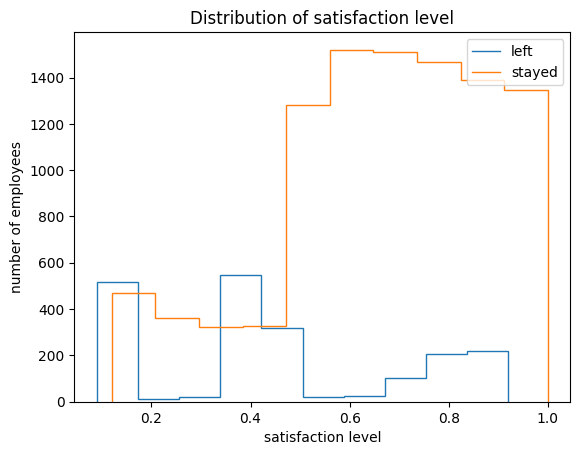

In [19]:
counts, bins = np.histogram(df1[df1['left']==1]['satisfaction_level'])
plt.stairs(counts, bins)

counts, bins = np.histogram(df1[df1['left']==0]['satisfaction_level'])
plt.stairs(counts, bins)
plt.legend(labels = ['left', 'stayed'])
plt.title('Distribution of satisfaction level')
plt.xlabel('satisfaction level')
plt.ylabel('number of employees')
plt.show()

As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. Satisfaction level of who stayed is skewed to the right where as for who left it is skewed right.

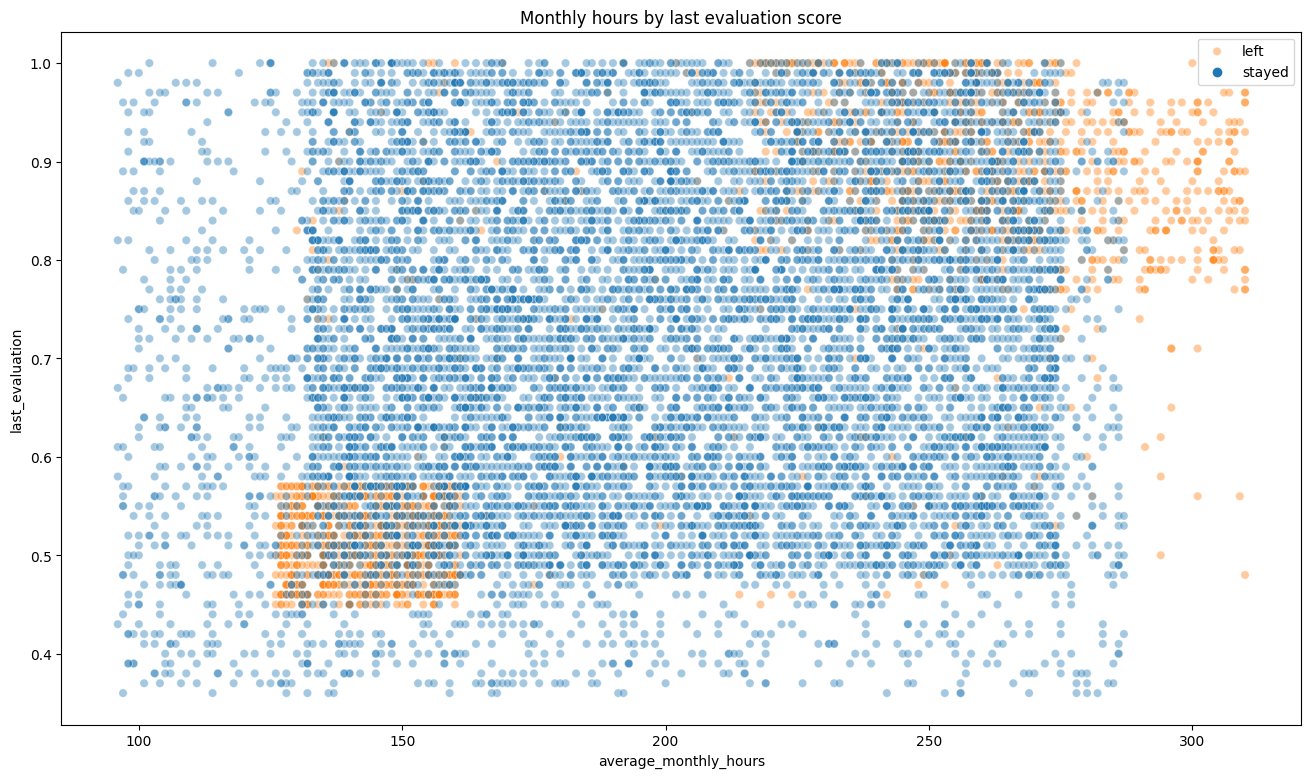

In [20]:
# Create a plot scatterplot of average_monthly_hours versus last_evaluation for finding correlation between them

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly hours by last evaluation score')
plt.show()

### Inferences
1. Most of the yellow points are clustered in two groups.
a. who have high average monthly hours and were on higher side of evaluation score.
b. who have less average monthly hours and were on lower side of evaluation score.

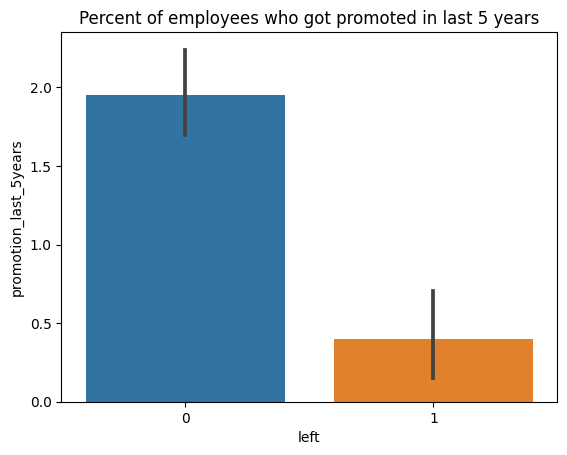

In [21]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
sns.barplot(data=df1, x='left', y=df1['promotion_last_5years']*100)
plt.title('Percent of employees who got promoted in last 5 years');

We can see that the employees who left got lesser promotion than those who stayed.

In [22]:
# Analysis department wise.
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

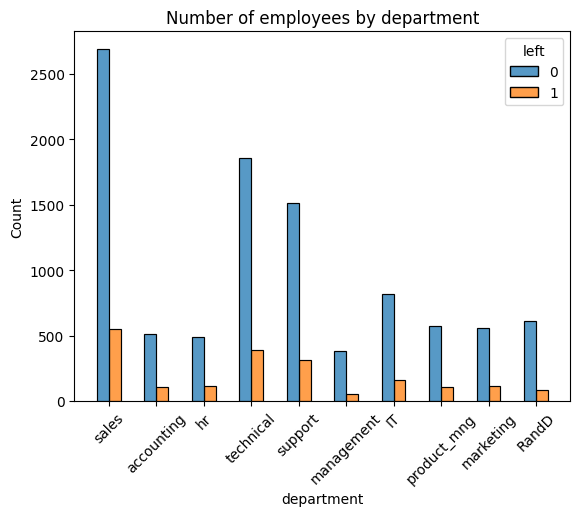

In [23]:
# Compare number of employees left for each department
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Number of employees by department');


C:\Users\dell\AppData\Local\Temp\ipykernel_456\1419883234.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap="PiYG")


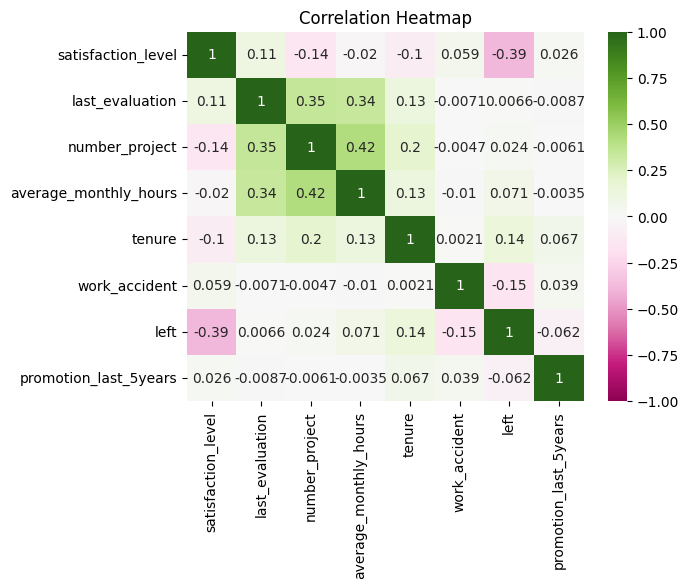

In [24]:
# Correlation between data by creating heatmap
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap="PiYG")
heatmap.set_title('Correlation Heatmap');

From the heatmap we can see that left have negative correlation with the satisfaction level whereas there is positive correlation among number of project, text evaluation and average monthly hours.

### Building a model to  prediction if the employee leaves.
Since the variable we want to predict (whether an employee leaves the company) is categorical, we can either build a Logistic Regression model, or a Tree-based Machine Learning model.

### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [25]:
df_enc = df1.copy()

df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
# Set dependent and independent variables
y = df_logreg['left']
X = df_logreg.drop('left', axis=1)

y.head() 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [29]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [30]:
# Get predictions on the test set
y_pred = log_clf.predict(X_test)

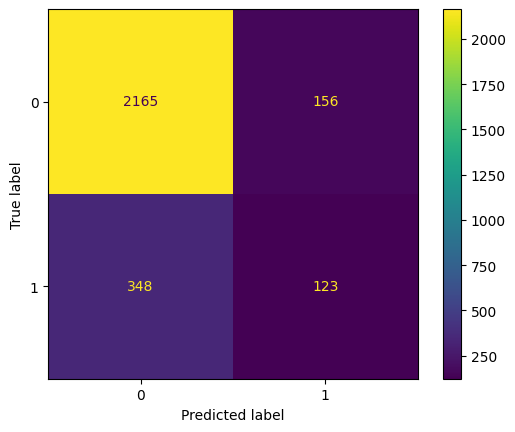

In [31]:
# Create a confusion matrix to visualize the results of the logistic regression model. 
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)
log_disp.plot(values_format='')
plt.show()

In [32]:
# Classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%.

Now let's build tree based model

### Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest. 

In [33]:
# Since tree based model is robust to outliers, we can use complete data.
y = df_enc['left']
X = df_enc.drop('left', axis=1)

X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [34]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree 

In [35]:
# Construct a decision tree model and set up cross-validated grid-search to find the best model parameters.
tree = DecisionTreeClassifier()

# Hyperparameters
cv_params = {'max_depth':[4, 6, 8, 10, None],
             'min_samples_leaf': [2, 5, 1, 7],
             'min_samples_split': [3, 2, 4, 6]
             }

#scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [36]:
%%time
tree1.fit(X_train, y_train)

# Best parameters
print(tree1.best_params_)

# Best AUC score on CV
print(tree1.best_score_)

{'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 3}
0.9698344969964589
CPU times: total: 34.2 s
Wall time: 34.3 s


This is a strong AUC score, which shows that this model can predict employees who will leave very well.

In [37]:
# Function that will help to extract all the scores from the grid search. 
def make_results(model_name:str, model_object, metric:str):
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [38]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.915522,0.913602,0.914495,0.971645,0.969834


All of these scores from the decision tree model are strong indicators of good model performance. 

Decision trees can be vulnerable to overfitting, so we can construct a random forest model as random forests avoid overfitting by incorporating multiple trees to make predictions.

#### Random forest 

In [40]:
rf = RandomForestClassifier(random_state=0)

#Hyperparameters
cv_params = {'max_depth': [2,4, None], 
             'max_features': [1.0],
             'max_samples': [0.5, 0.8],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3,4],
             'n_estimators': [50, 100, 150],
             }  

#Scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [41]:
%%time
rf1.fit(X_train, y_train) 

CPU times: total: 20min
Wall time: 20min 8s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, None], 'max_features': [1.0],
                         'max_samples': [0.5, 0.8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

#### Save the model so that we may not need to fit data again

In [55]:
# Path to the folder to save the model
path = 'C:/Users/dell/Desktop/Files/'

In [56]:
# Define functions to pickle the model and read in the model.
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [57]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [58]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [59]:
# Best AUC score on CV
rf1.best_score_

# Best params
rf1.best_params_

{'max_depth': 4,
 'max_features': 1.0,
 'max_samples': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

Identify the optimal values for the parameters of the random forest model.

In [60]:
# Compare CV scores with Decision Tree
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.915522  0.913602  0.914495  0.971645  0.969834
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.913008  0.913603  0.913276    0.9712  0.979501


The scorings of the random forest model are comparable with decision tree but auc is more in case of random forest than the decision tree model. So, the random forest model can be used.

Now let's evaluate the final model on the test set.

In [61]:
# Function that gets all the scores from a model's predictions on test data.
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
    return table

Now use the best performing model to predict on the test set.

In [62]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.934292,0.913655,0.923858,0.974983,0.950427


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

Plot a confusion matrix to visualize how well it predicts on the test set.

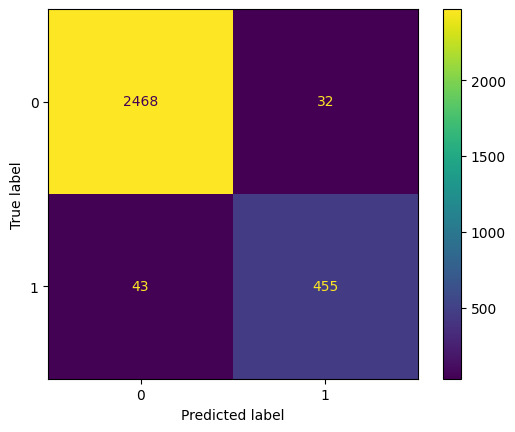

In [63]:
# Generate array of values for confusion matrix
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)
disp.plot(values_format='');

To find the most important features, inspect the splits of the decision tree model and the most important features in the random forest model. 

#### Decision tree splits

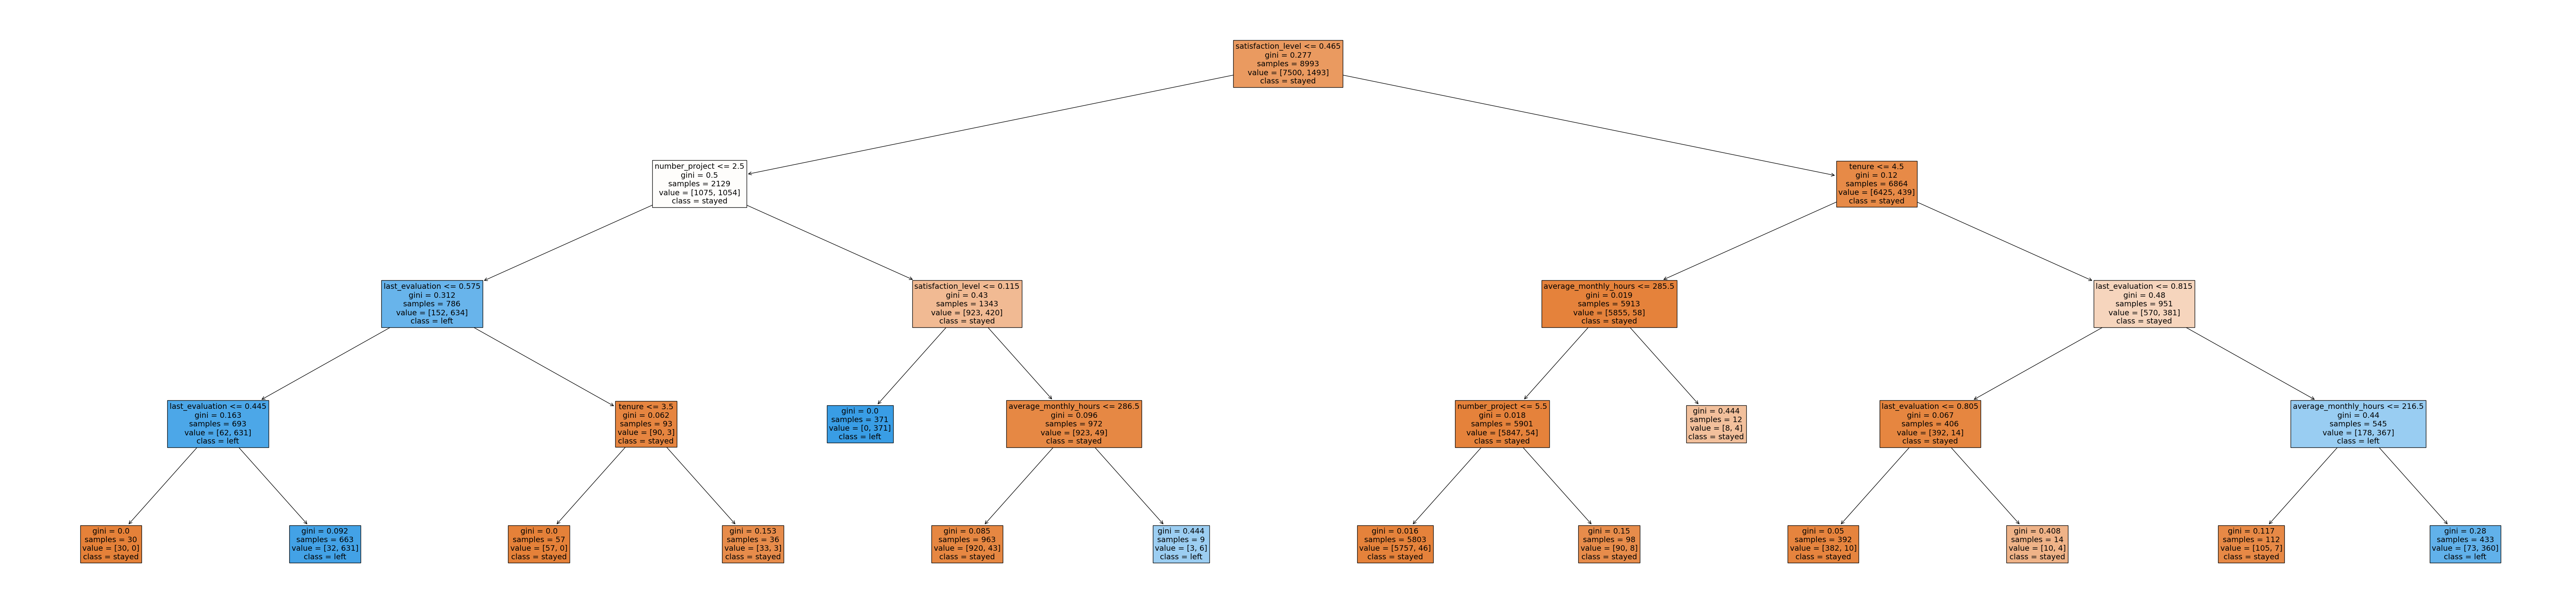

In [69]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns.tolist(), 
          class_names=['stayed','left'], filled=True);
plt.show()

#### Decision tree feature importance

In [70]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Filter the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
satisfaction_level,0.526579
last_evaluation,0.179166
tenure,0.121243
number_project,0.117545
average_monthly_hours,0.055468


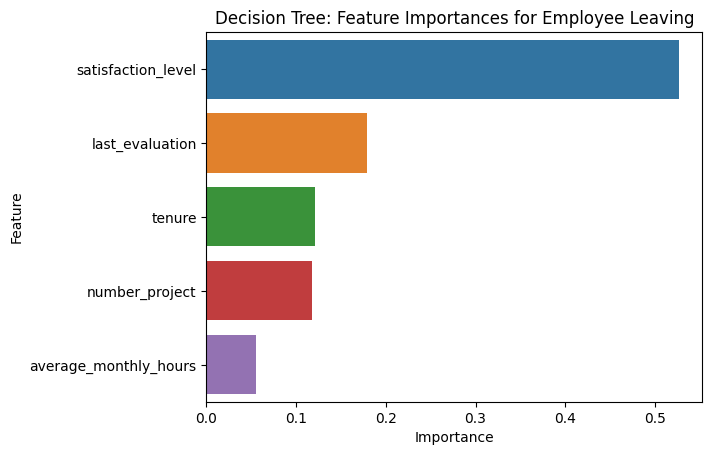

In [71]:
# Barplot to visualize the decision tree feature importances.
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving")
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `satisfaction level`, `last_evaluation`, `tenure`, `number_project` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

#### Random forest feature importance

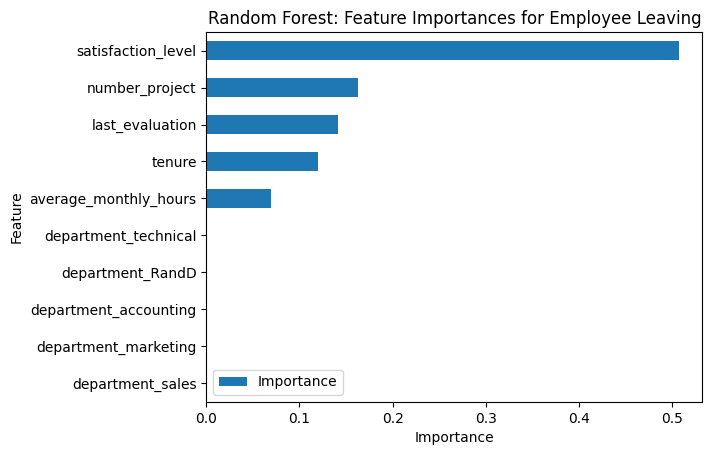

In [72]:
rf_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
top10 = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[top10]

# Filter `feat_impt` to consist of top 10 feature importances
rf_impt = rf_impt[top10]

y_df = pd.DataFrame({"Feature":feat,"Importance":rf_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving")
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `satisfaction level`, `number_project`, `last_evaluation`, `tenure` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are almost same as the ones used by the decision tree model.

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

**Tree-based Machine Learning**

The decision tree model achieved AUC of 96.8%, precision of 91.5%, recall of 91.3%, f1-score of 91.4%, and accuracy of 97.1%, on the test set. The random forest also performed similarly.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

1. Either don't over-work the employees or if doing so, give bonus/overtime compensations.
2. Limit how many projects an employee can take on. It should be around 3-5 and never more than 6.
3. Promote employees when they are at 4th year as there were many outliers with less satisfaction score and in 5th and 6th year, many employees leave.
4. As last_evaluation was the most important feature, and we saw that high evaluation score was given to employees who worked lot many hours. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

We can try building a K-means model on this data and analyzing the clusters. That may also give some more insights. 